# This jupyter notebook contains examples of
- basic ramachandran/janin plot related functions

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import MDAnalysis as mda
import pyrexMD.core as core
import pyrexMD.misc as misc
import pyrexMD.analysis.dihedrals as dih

In [2]:
### define MDAnalysis universes to handle data. 
# in this case we define:
# - ref: universe with reference structure
# - mobile: universe with trajectory

pdb = "files/traj/2hba_ChainB_ref.pdb"
xtc = "files/traj/traj2_protein.xtc"
u = mda.Universe(pdb, xtc)

tv = core.iPlayer(u)
tv()

<IPython.core.display.Javascript object>


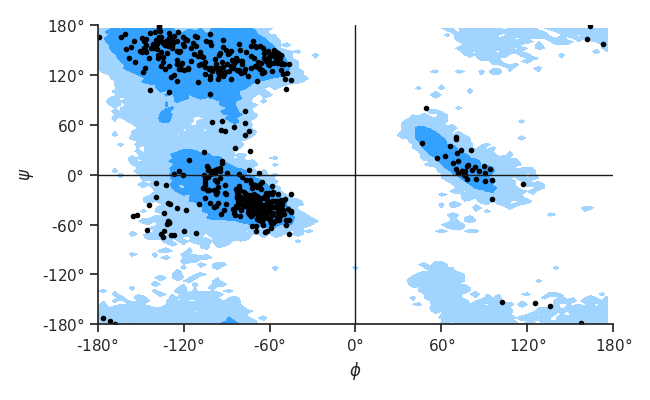

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


In [3]:
### Ramachandran plot with allowed regions
rama1 = dih.get_ramachandran(u)

<IPython.core.display.Javascript object>


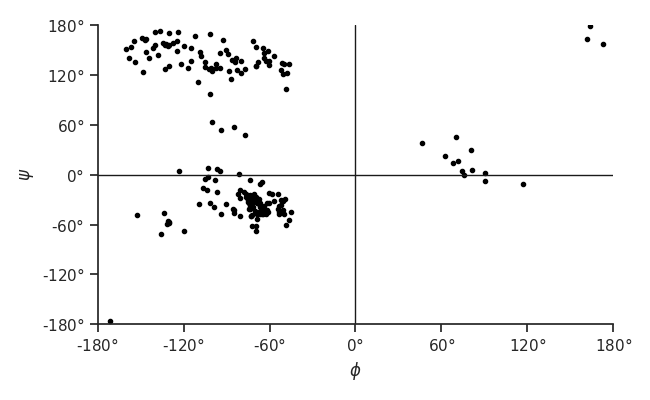

In [4]:
### Ramachandran plot without allowed regions; use only selected frames
rama2 = dih.get_ramachandran(u, stop=4, ref=False)

In [5]:
### get dihedral angles for selection
phi = dih.get_phi_values(u, sel="protein and resid 1-3")
psi = dih.get_psi_values(u, sel="protein and resid 1-3")
omega = dih.get_omega_values(u, sel="protein and resid 1-3")

misc.cprint("phi:", "red")
print(phi)
misc.cprint("psi:", "red")
print(psi)
misc.cprint("omega:", "red")
print(omega)

phi:
[[ -94.2490553  -134.11862569]
 [-110.23838662 -114.73875863]
 [-105.13562921 -138.15415493]
 [-122.06198621 -133.04487225]
 [-119.56785192 -129.31588009]
 [ -94.92040776 -120.18164659]
 [ -94.2729516  -132.16479131]
 [ -79.20203763 -138.68120185]
 [ -92.26693366 -127.99439402]
 [-101.78734037 -120.21541684]
 [ -74.85216927 -134.6425781 ]]
psi:
[[126.03877    128.28416771 158.2916803 ]
 [138.1825394  110.88327513 152.01690005]
 [121.61271226 129.50691102 143.54975729]
 [135.02769844 133.24712537 156.4335019 ]
 [129.03259621 126.32018181 165.06829462]
 [105.95610314 119.32969776 156.5940091 ]
 [ 96.62716815 125.4744334  160.42842414]
 [ 98.44896246 132.75286779 151.2379103 ]
 [129.85801303 122.19017899 153.17059107]
 [120.61506342 118.37279574 165.74215948]
 [106.47553358 118.435017   141.66578952]]
pomega:
[[ 166.07856359 -168.48960605  168.46510947]
 [ 179.96659543 -178.92973544  159.63252505]
 [ 175.20723121 -164.6080749   169.6879503 ]
 [ 175.60765884 -157.67694688  169.7635558

<IPython.core.display.Javascript object>


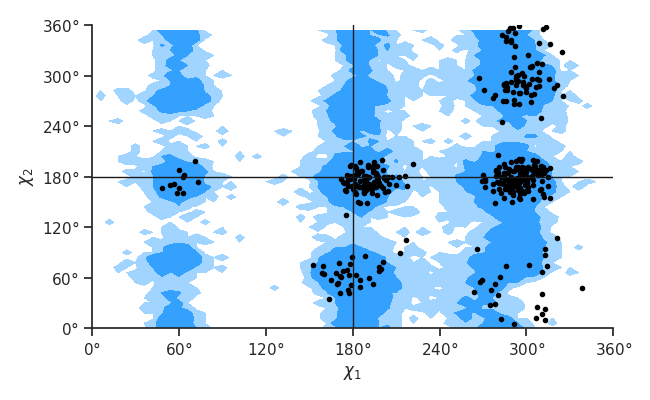

All ALA, CYS, GLY, PRO, SER, THR, and VAL residues have been removed from the selection.


In [6]:
### Janin plot with allowed regions
janin = dih.get_janin(u)

<IPython.core.display.Javascript object>


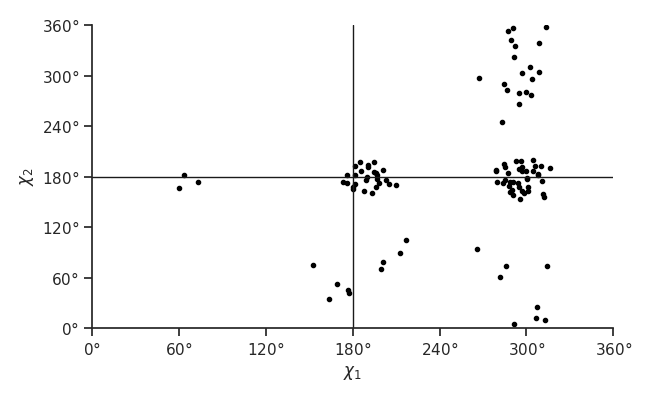

In [28]:
### Janin plot without allowed regions; use only selected frames
janin = dih.get_janin(u, stop=3, ref=False, verbose=False)

In [36]:
### get dihedral angles for selection
chi1 = dih.get_chi1_values(u, sel="protein and resid 1-4", verbose=False)
chi2 = dih.get_chi1_values(u, sel="protein and resid 1-4", verbose=False) # Note: chi2 selection bugged in MDAnalysis 2.0.0

misc.cprint("chi1:", "red")
print(chi1)
misc.cprint("chi2:", "red")
print(chi2)

All ALA, CYS, GLY, PRO, SER, THR, and VAL residues have been removed from the selection.
chi1:
[[-160.68856689 -178.47087941  -63.69651797 -170.51494844]
 [ 176.78472704 -163.69946714  -60.96061396 -161.56502273]
 [ 169.03755493 -174.71422658  -54.16803551 -163.30554975]
 [ 159.95128394 -165.71232461  -76.69875584 -177.75868131]
 [ 170.01888382 -170.94476745  -70.68040368 -175.68274378]
 [ 171.19905487 -172.0990776   -69.78518522 -155.76572552]
 [ 178.68791664 -164.21235261  -59.94593149 -178.70892073]
 [ 164.87517882 -160.61958914  -57.73509058 -172.16323822]
 [ 179.28579855 -158.59468403  -52.79173243 -167.74330617]
 [-168.84703794  174.93263129  -39.8986525  -170.82988675]
 [-175.12382763 -162.49437451  -59.79546318  176.66422353]]
